# Findings

##### The reason we aren't making money currently is due to the non stationarity in price differences
- We are looking at long time intervals, i.e. daily price data 
    - Mean reversion requires the underlying difference time series to be staionary for longer term data
        - file:///C:/Users/Reece/Desktop/meanrev.pdf
    - If we were working in shorter time period data, this would not matter and only correlation would
- When betting according to the trend in the time series, profit (or losses) dramatically adjust
- e.g. with MSFT, AAPL on QC

##### Mean reverting strategies perform well in calm markets, whereas momentum strategies perform in crazy markets
- Want to be volatility neutral so our strategy hedges this risk. 

##### We only are exiting when prices revert back to mean - no form of stop loss
- Instead of a standard stop loss, should implement a momentum strategy which counteracts the losses which are to be incurred 

# Todo:

##### Find more pairs which work
- identify trend using this notebook, only bet accordingly (i.e. only long if upward trend, only short if downward trend)

##### Implement a 'stop loss'
- Use a momentum breakout strategy which covers the risk until back within desired mean reverting parameters
- Also possible to trade this strategy only when markets are deemed calm, trade momentum strategy when markets not calm
    - could involve deep leanrning to classify market conditions, could just be a decsion based on a function of volatility, etc.
    
##### Learn and apply cointegration concepts 
- essentially, if you hold 2 stocks and that portfolio is stationary, the 2 stocks are cointegrated
- Maybe, the ratio between 2 stocks needs to be changed for the resulting process to be stationary
- https://www.aptech.com/blog/a-guide-to-conducting-cointegration-tests/

##### Good videos to watch:
- https://www.youtube.com/watch?v=sFwyS-L-aDE&ab_channel=QuantInstiQuantitativeLearning
- https://www.youtube.com/watch?v=5G7YdjnRvVI&ab_channel=QuantInstiQuantitativeLearning

# Check for stationarity


In [1]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

#used to check for stationarity in the time series
from statsmodels.tsa.stattools import adfuller, kpss
from scipy.stats import linregress

In [2]:
def check_stationarity(series, alpha):
    
    #h_0 is that the series has a unit root-> if so, likely non-stationarity
    result_adf = adfuller(series)
    p_val = result_adf[1]
    if p_val < alpha:
        #reject, likely stationary
        print("ADF test: p-val=",p_val,"-> Conclusion: likely stationary")
    else:
        print("ADF test: p-val=",p_val,"-> Conclusion: likely has a trend")
        
    print("----------------------------------------------------------------")
    
    result_kpss = kpss(diff)
    p_val = result_kpss[1]
    if p_val > alpha:
        #reject, likely stationary
        print("KPSS test: p-val=",p_val,"-> Conclusion: likely stationary")
    else:
        print("KPSS test: p-val=",p_val,"-> Conclusion: likely has a trend")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


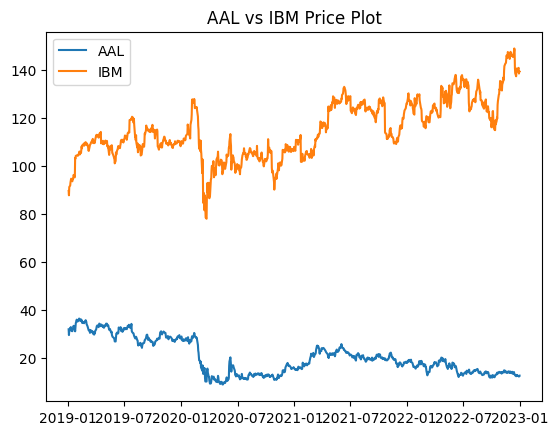

In [3]:
start_date = "2019-01-01"
end_date = "2023-01-01"

stk1 = "AAL"
stk2 = "IBM"

msft_data = yf.download(stk1,start=start_date,end=end_date)
aapl_data = yf.download(stk2,start=start_date,end=end_date)

plt.plot(msft_data["Adj Close"],label=stk1)
plt.plot(aapl_data["Adj Close"],label=stk2)
plt.legend()
plt.title(f"{stk1} vs {stk2} Price Plot")
plt.show()

# Current Methodology

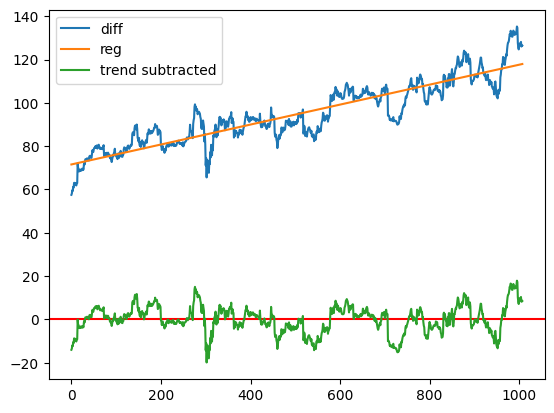

ADF test: p-val= 2.8247408120892017e-05 -> Conclusion: likely stationary
----------------------------------------------------------------
KPSS test: p-val= 0.01 -> Conclusion: likely has a trend


/Users/olegglotov/Documents/REST/DFICalgorithms/venv/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [4]:
# diff = msft_data["Adj Close"] - aapl_data["Adj Close"]
diff = aapl_data["Adj Close"] - msft_data["Adj Close"]

time = np.arange(len(diff))
reg = linregress(time,diff)
line = reg.intercept + reg.slope*time
new_series = diff - line

plt.plot(time,diff, label = "diff")
plt.plot(time,line, label = "reg")
plt.axhline(0, color='red')
plt.plot(time, new_series, label = "trend subtracted")
plt.legend()
plt.show()

check_stationarity(new_series,0.05)

#The resulting time series is not stationary => the stocks are not cointegrated
#Maybe they are cointegrated in a different proportion, e.g. short 1.5 AAPL to long 1 MSFT

# Time Series Differencing

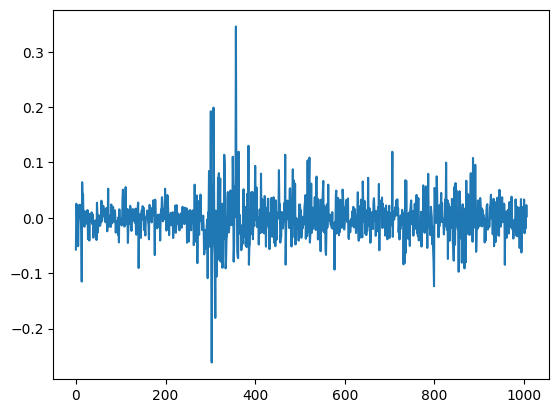

ADF test: p-val= 1.850924997646233e-29 -> Conclusion: likely stationary
----------------------------------------------------------------
KPSS test: p-val= 0.1 -> Conclusion: likely stationary


/Users/olegglotov/Documents/REST/DFICalgorithms/venv/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [5]:
diff = np.diff(np.log(msft_data["Adj Close"]) - np.log(aapl_data["Adj Close"])) 

time = np.arange(len(diff))
plt.plot(time,diff, label = "diff")
plt.show()

check_stationarity(diff,0.05)